In [90]:
import tensorflow as tf
from tensorflow import keras
from keras import layers
import numpy as np
import pandas as pd

In [91]:
fm_dataset = pd.read_csv("Data/Apache_AllNumeric.csv")

fm_features = fm_dataset.copy()
fm_labels = fm_features.pop('PERF') / 1000

In [92]:
inputs = {}

for name, column in fm_features.items():
    dtype = tf.float32
    inputs[name] = keras.Input(shape=(1,), name=name, dtype=dtype)

In [93]:
numeric_inputs  = {name: input for name, input in inputs.items()}

x = layers.Concatenate()(list(numeric_inputs.values()))
norm = layers.Normalization()
norm.adapt(np.array(fm_dataset[numeric_inputs.keys()]))
all_numeric_inputs = norm(x)

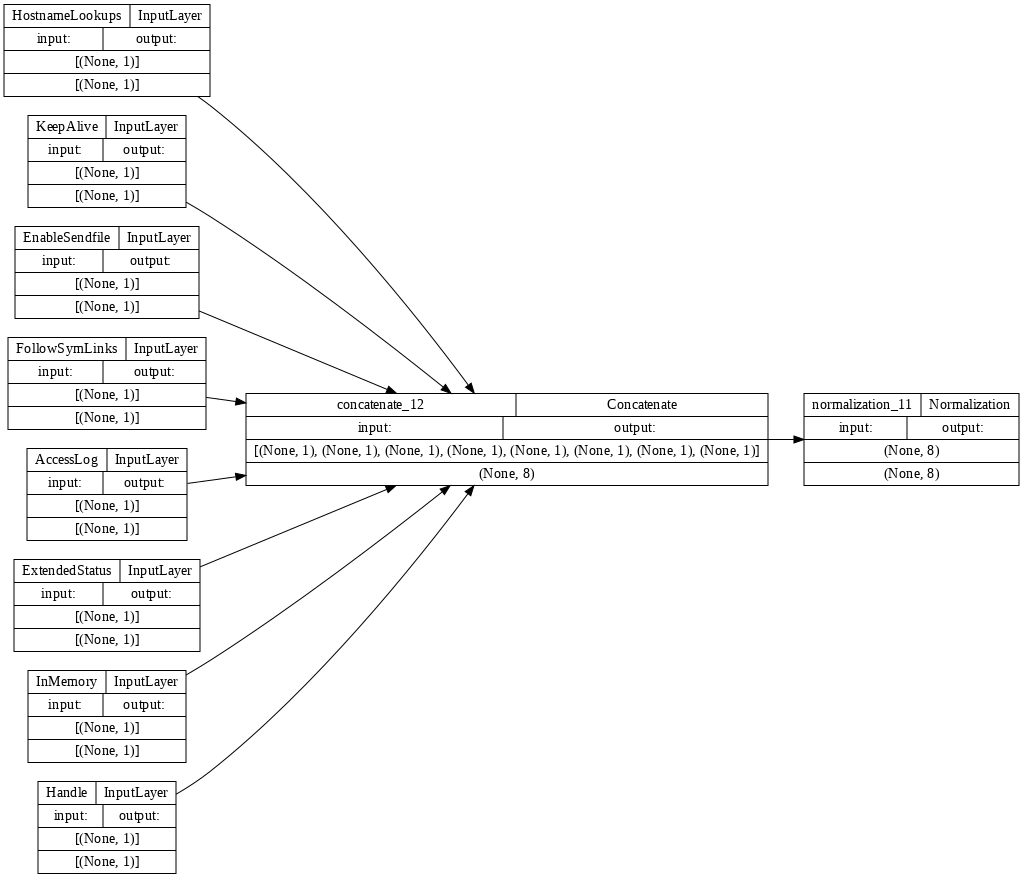

In [94]:
fm_preprocessing = keras.Model(inputs, all_numeric_inputs)
tf.keras.utils.plot_model(model = fm_preprocessing , rankdir="LR", dpi=72, show_shapes=True)

In [95]:
fm_features_dict = {name: np.array(value) for name, value in fm_features.items()}

In [96]:
def fm_model(preprocessing_head, inputs):
    body = keras.Sequential([
        layers.Dense(20, activation='relu', kernel_regularizer=keras.regularizers.l1(0.009)),
        layers.Dense(10, activation='relu', kernel_regularizer=keras.regularizers.l1(0.009)),
        layers.Dense(1)
    ])
    preprocessed_inputs = preprocessing_head(inputs)
    result = body(preprocessed_inputs)
    model = keras.Model(inputs, result)
    model.compile(optimizer=keras.optimizers.Adam(lr=0.001),
                loss="mean_squared_error",
                metrics=[keras.metrics.MeanSquaredError()])
    return model

In [97]:
fm_model = fm_model(fm_preprocessing, inputs)
fm_model.fit(x=fm_features_dict, y=fm_labels, epochs=50, batch_size=10)

Epoch 1/50


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


20/20 [==============================] - 1s 2ms/step - loss: 1.4961 - mean_squared_error: 0.7536
Epoch 2/50
20/20 [==============================] - 0s 2ms/step - loss: 1.1209 - mean_squared_error: 0.3852
Epoch 3/50
20/20 [==============================] - 0s 2ms/step - loss: 0.9583 - mean_squared_error: 0.2332
Epoch 4/50
20/20 [==============================] - 0s 2ms/step - loss: 0.8910 - mean_squared_error: 0.1814
Epoch 5/50
20/20 [==============================] - 0s 2ms/step - loss: 0.8481 - mean_squared_error: 0.1559
Epoch 6/50
20/20 [==============================] - 0s 2ms/step - loss: 0.8098 - mean_squared_error: 0.1349
Epoch 7/50
20/20 [==============================] - 0s 3ms/step - loss: 0.7760 - mean_squared_error: 0.1191
Epoch 8/50
20/20 [==============================] - 0s 2ms/step - loss: 0.7460 - mean_squared_error: 0.1071
Epoch 9/50
20/20 [==============================] - 0s 2ms/step - loss: 0.7186 - mean_squared_error: 0.0972
Epoch 10/50
20/20 [====================